In [9]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [7]:

df=pd.read_csv('/content/telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [10]:
# Data cleaning and preprocessing
# Handle missing values if any
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [14]:
print(df.describe())

             Churn  AccountWeeks    DataUsage  CustServCalls      DayMins  \
count  3333.000000   3333.000000  3333.000000    3333.000000  3333.000000   
mean      0.144914    101.064806     0.816475       1.562856   179.775098   
std       0.352067     39.822106     1.272668       1.315491    54.467389   
min       0.000000      1.000000     0.000000       0.000000     0.000000   
25%       0.000000     74.000000     0.000000       1.000000   143.700000   
50%       0.000000    101.000000     0.000000       1.000000   179.400000   
75%       0.000000    127.000000     1.780000       2.000000   216.400000   
max       1.000000    243.000000     5.400000       9.000000   350.800000   

          DayCalls  MonthlyCharge   OverageFee     RoamMins  
count  3333.000000    3333.000000  3333.000000  3333.000000  
mean    100.435644      56.305161    10.051488    10.237294  
std      20.069084      16.426032     2.535712     2.791840  
min       0.000000      14.000000     0.000000     0.00000

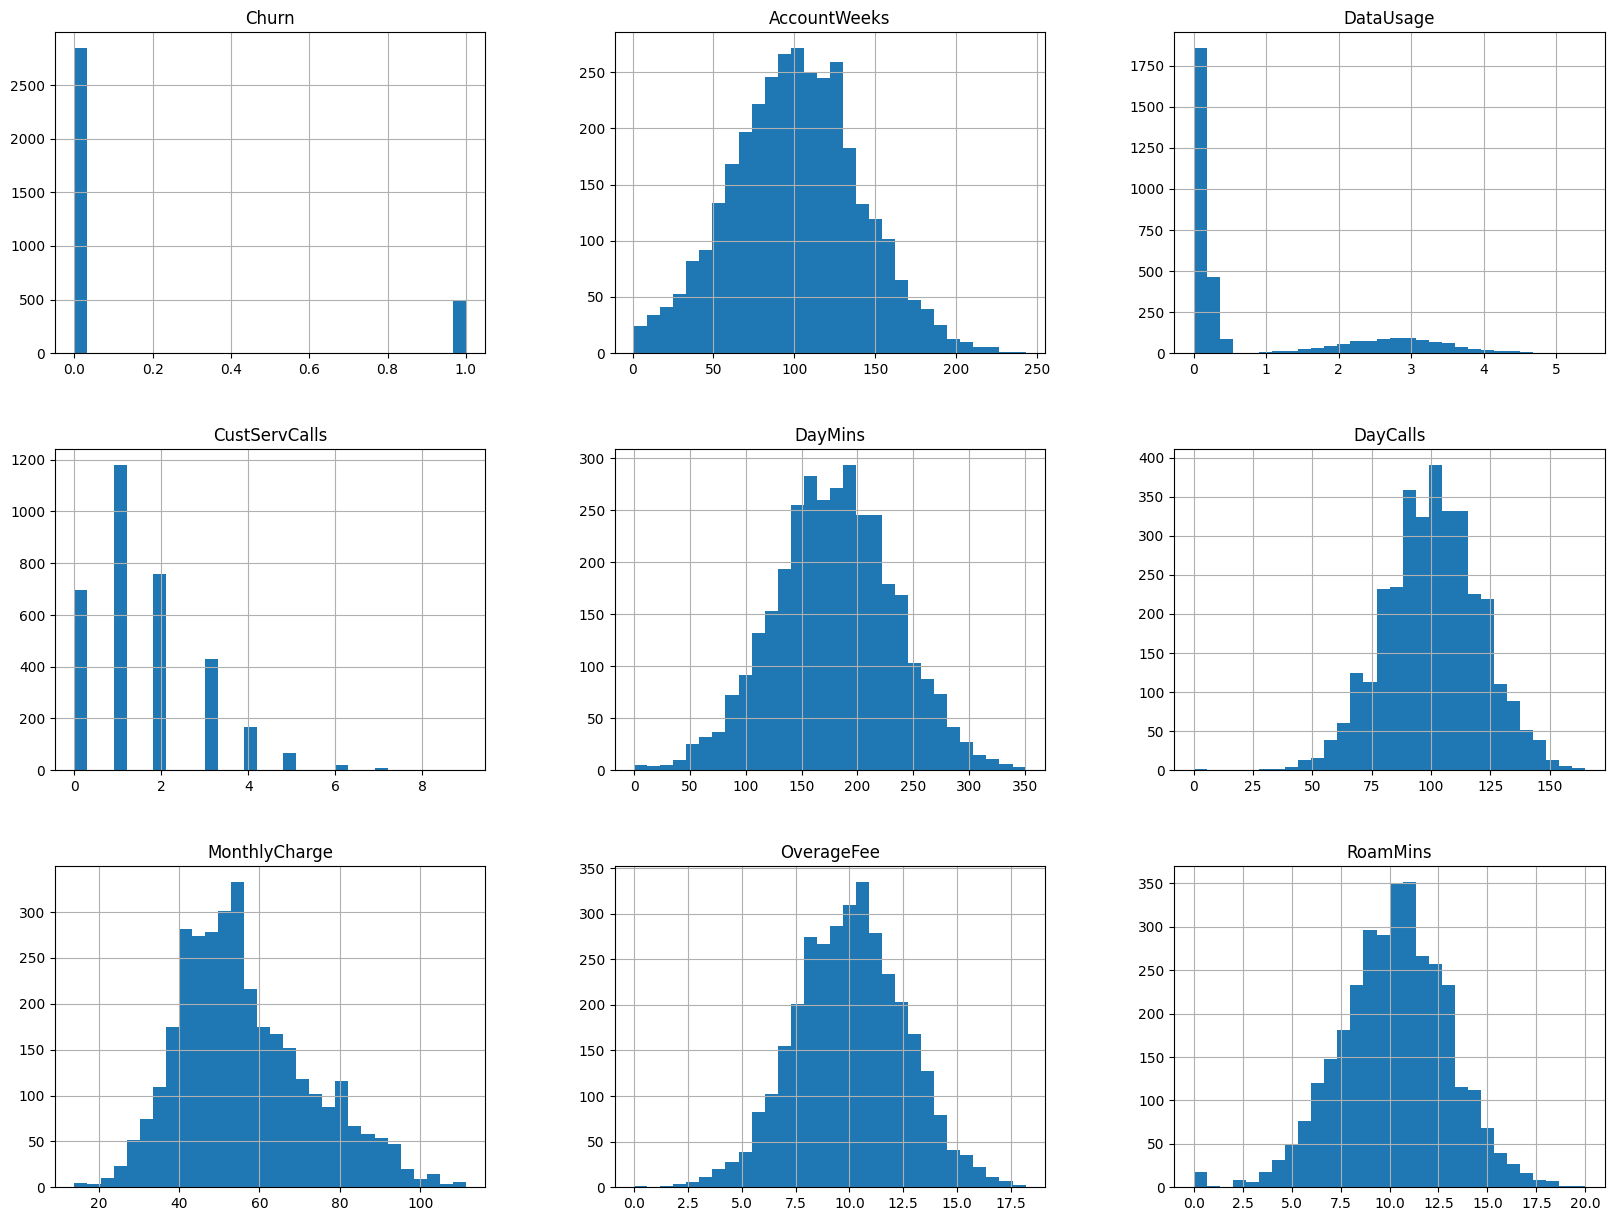

In [17]:
# Plot distributions of features
df.hist(bins=30, figsize=(20, 15))
plt.show()

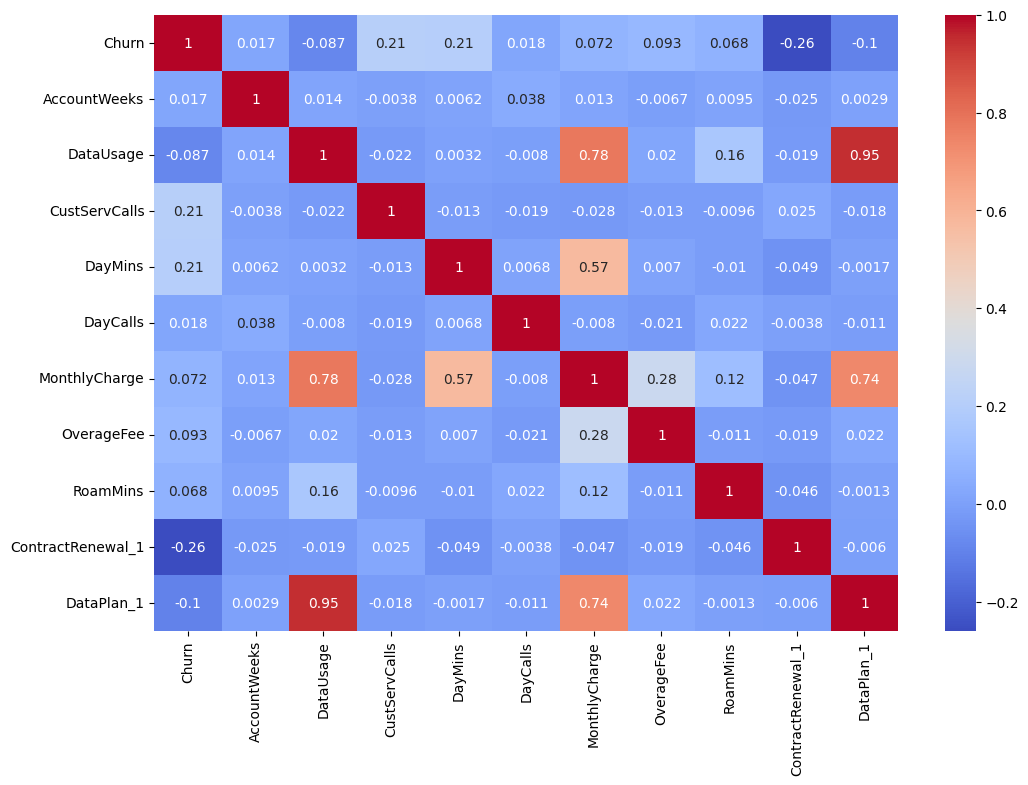

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Train logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Train random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Evaluate models
for model in [log_model, rf_model]:
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

Model: LogisticRegression
Accuracy: 0.8590704647676162
Confusion Matrix:
 [[555  11]
 [ 83  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



Model: RandomForestClassifier
Accuracy: 0.9280359820089955
Confusion Matrix:
 [[556  10]
 [ 38  63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.86      0.62      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667





In [23]:
import numpy as np

# Create a small test dataset (using actual data or random values for testing)
# Replace the values with actual sample data
test_data = {
    'AccountWeeks': [120, 85, 200],
    'DataUsage': [0.1, 5.5, 10.0],
    'CustServCalls': [1, 3, 0],
    'DayMins': [200, 300, 100],
    'DayCalls': [100, 150, 80],
    'MonthlyCharge': [50, 100, 120],
    'OverageFee': [0, 15, 25],
    'RoamMins': [5, 10, 20],
    'ContractRenewal_1': [1, 0, 1],  # Dummy variable for ContractRenewal
    'DataPlan_1': [0, 1, 1]  # Dummy variable for DataPlan
}

# Convert the test data to a DataFrame
test_df = pd.DataFrame(test_data)

# Standardize the test data using the same scaler from training
X_test_sample = scaler.transform(test_df)

# Make predictions using both models
print("Logistic Regression Prediction:", log_model.predict(X_test_sample))
print("Random Forest Prediction:", rf_model.predict(X_test_sample))

Logistic Regression Prediction: [0 1 0]
Random Forest Prediction: [0 0 0]
